## 라이브러리 호출 


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

## 1. 데이터 불러오기 

In [125]:
raptor = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/eoraptor/eoraptor.csv")
raptor

,case,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## 결측치 확인후 제거


In [52]:
raptor.isna().sum()

case            0
site            0
sex             0
age             2
head_length     0
skull_width     0
total_length    0
tail_length     0
foot_length     1
earconch        0
eye             0
chest           0
belly           0
dtype: int64

In [54]:
raptor.dropna(axis = 0 ,inplace= True) #axis == 0 이면 행을 없앰. (axis == 0 이게 default ) , axis == 1 이면 열을 없애버림. 
raptor.isna().sum()

case            0
site            0
sex             0
age             0
head_length     0
skull_width     0
total_length    0
tail_length     0
foot_length     0
earconch        0
eye             0
chest           0
belly           0
dtype: int64

In [55]:
raptor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case          101 non-null    int64  
 1   site          101 non-null    int64  
 2   sex           101 non-null    object 
 3   age           101 non-null    float64
 4   head_length   101 non-null    float64
 5   skull_width   101 non-null    float64
 6   total_length  101 non-null    float64
 7   tail_length   101 non-null    float64
 8   foot_length   101 non-null    float64
 9   earconch      101 non-null    float64
 10  eye           101 non-null    float64
 11  chest         101 non-null    float64
 12  belly         101 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 11.0+ KB


In [126]:
print("성별 ")
print(raptor["sex"].unique())

print("발굴장소")
print(raptor["site"].unique())

성별 
['m' 'f']
발굴장소
[1 2 3 4 5 6 7]


In [127]:
raptor_train , raptor_test = train_test_split(raptor , test_size = 0.2 , random_state= 1 , shuffle= True)

#raptor 를 8 : 2 로 나눔 ! 
print(len(raptor))
print(len(raptor_train))
print(len(raptor_test))

104
83
21


## 2. 탐색적 데이터 분석 (EDA = Exploratory Data Analysis)

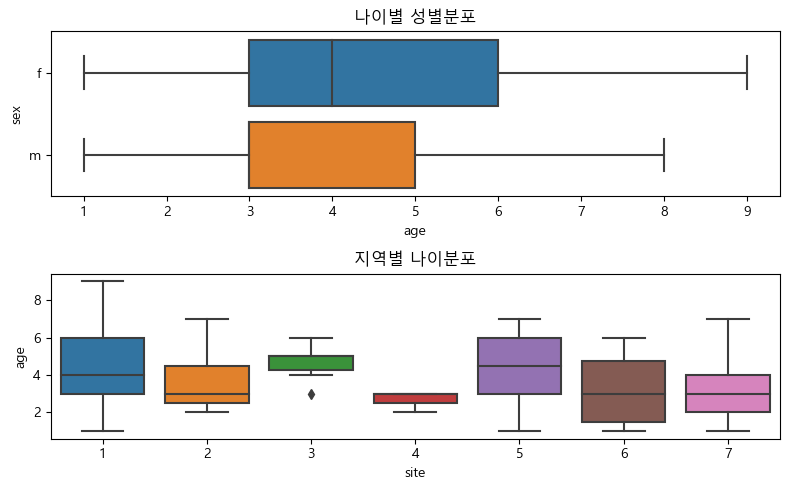

In [128]:
fig , axes = plt.subplots(2, figsize=(8,5))

sns.boxplot(x = "age" , y = "sex" , data = raptor_train , ax = axes[0])
axes[0].set_title("나이별 성별분포")
sns.boxplot(x = "site" , y = "age" , data = raptor_train ,ax = axes[1])
axes[1].set_title("지역별 나이분포")
plt.tight_layout()
plt.show()

In [129]:
#피 봇 테이블로 한눈에 보기 
#index를 age 로 하고 columns를 성별로 해서 모든 분야 평균

# pivot_raptor = round(raptor.pivot_table(raptor , index="age", columns="sex", aggfunc= "mean"),2)

pivot_raptor = round(raptor.pivot_table("total_length" , index="age", columns="sex", aggfunc= "mean"),2)
pivot_raptor

sex,f,m
age,,
1.0,85.00,81.79
2.0,84.79,89.39
3.0,88.14,87.42
4.0,88.33,85.25
5.0,87.83,87.07
6.0,91.00,88.20
7.0,87.00,86.67
8.0,NaN,89.00
9.0,90.50,NaN


In [130]:
#단위가 이렇게 된다면. 전부다 동일하게 만들기. 
#mm - head_length , skull_length , foot_length , earconch eye
#나머지는 cm

#전부 cm 로 통일 시키기. 
raptor["head_length"] = raptor["head_length"]/10
raptor["skull_width"] = raptor["skull_width"]/10
raptor["foot_length"] = raptor["foot_length"]/10
raptor["earconch"] = raptor["earconch"]/10
raptor["eye"] = raptor["eye"]/10
raptor

,case,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,1,m,8.0,9.41,6.04,89.0,36.0,7.45,5.45,1.52,28.0,36.0
1,2,1,f,6.0,9.25,5.76,91.5,36.5,7.25,5.12,1.60,28.5,33.0
2,3,1,f,6.0,9.40,6.00,95.5,39.0,7.54,5.19,1.55,30.0,34.0
3,4,1,f,6.0,9.32,5.71,92.0,38.0,7.61,5.22,1.52,28.0,34.0
4,5,1,f,2.0,9.15,5.63,85.5,36.0,7.10,5.32,1.51,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,m,1.0,8.95,5.60,81.5,36.5,6.60,4.68,1.48,23.0,27.0
100,101,7,m,1.0,8.86,5.47,82.5,39.0,6.44,4.80,1.40,25.0,33.0
101,102,7,f,6.0,9.24,5.50,89.0,38.0,6.35,4.54,1.30,25.0,30.0
102,103,7,m,4.0,9.15,5.52,82.5,36.5,6.29,4.59,1.54,25.0,29.0


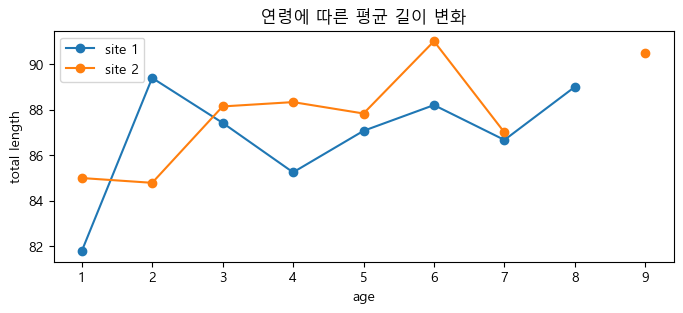

In [131]:
#연령에 따른 평균 길이. 

tl_age_by_sex = pivot_raptor[["m","f"]]
plt.figure(figsize =(8,3))
plt.plot(tl_age_by_sex ,marker = 'o')
plt.title("연령에 따른 평균 길이 변화")

plt.xlabel("age")
plt.ylabel("total length")
plt.legend([f"site {i}" for i in pivot_raptor2.columns])
plt.show()

In [132]:
#연령에 따른 평균 길이 
pivot_raptor2 = round(raptor.pivot_table("total_length" , index="age", columns="site", aggfunc= "mean"),2)
pivot_raptor2 

site,1,2,3,4,5,6,7
age,,,,,,,
1.0,90.00,75.00,NaN,NaN,81.25,82.0,82.00
2.0,86.33,83.00,89.0,92.17,NaN,NaN,88.50
3.0,91.50,80.83,91.0,92.35,88.67,85.2,86.25
4.0,89.00,85.00,85.0,93.00,85.00,82.5,84.67
5.0,89.38,83.00,86.0,NaN,88.33,89.0,84.00
6.0,91.90,NaN,93.5,NaN,89.25,86.5,86.75
7.0,90.00,84.25,NaN,91.50,86.50,NaN,84.00
8.0,89.00,NaN,NaN,NaN,NaN,NaN,NaN
9.0,90.50,NaN,NaN,NaN,NaN,NaN,NaN


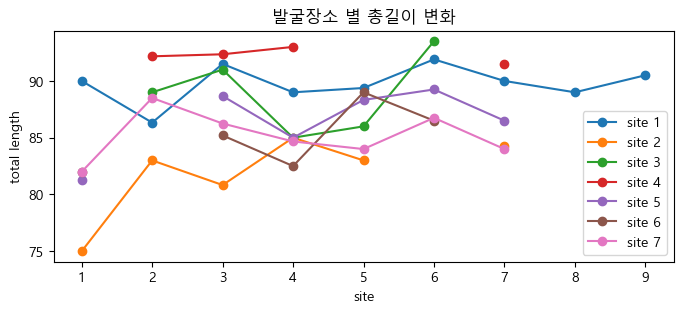

In [133]:
plt.figure(figsize = (8,3))
plt.plot(pivot_raptor2 , marker="o")
plt.title("발굴장소 별 총길이 변화")
plt.xlabel("site")
plt.ylabel("total length")
plt.legend([f"site {i}" for i in pivot_raptor2.columns])
plt.show()

In [134]:
# head_length ~ belly 까지 열 이름 
measured = raptor_train.columns[4:]
measured

Index(['head_length', 'skull_width', 'total_length', 'tail_length',
       'foot_length', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

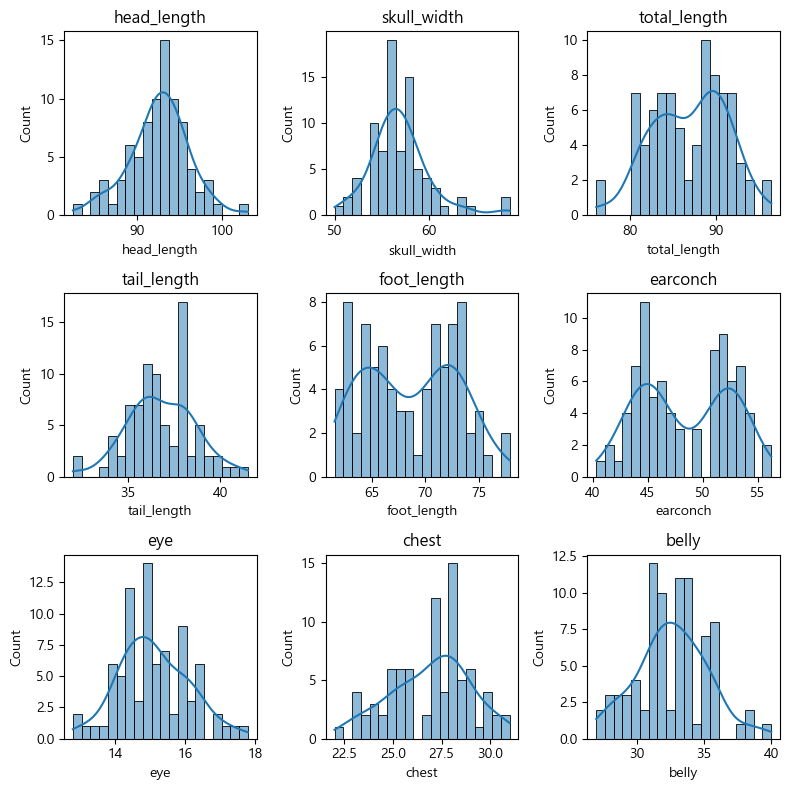

In [136]:
fig , axes = plt.subplots(3,3 , figsize = (8,8))
axes = axes.ravel()

for index , columns in enumerate (measured):
    sns.histplot(x = columns , data = raptor_train , ax = axes[index], bins = 20 ,kde = True)#kde 는 선그래프도 보여줌 
    axes[index].set_title(str(columns))
    
plt.tight_layout()
plt.show()

In [137]:
#상관 분석을 위한 열 목록( 카테고리형 제외 )
numeric_columns = ["age"]+list(measured)
numeric_columns

['age',
 'head_length',
 'skull_width',
 'total_length',
 'tail_length',
 'foot_length',
 'earconch',
 'eye',
 'chest',
 'belly']

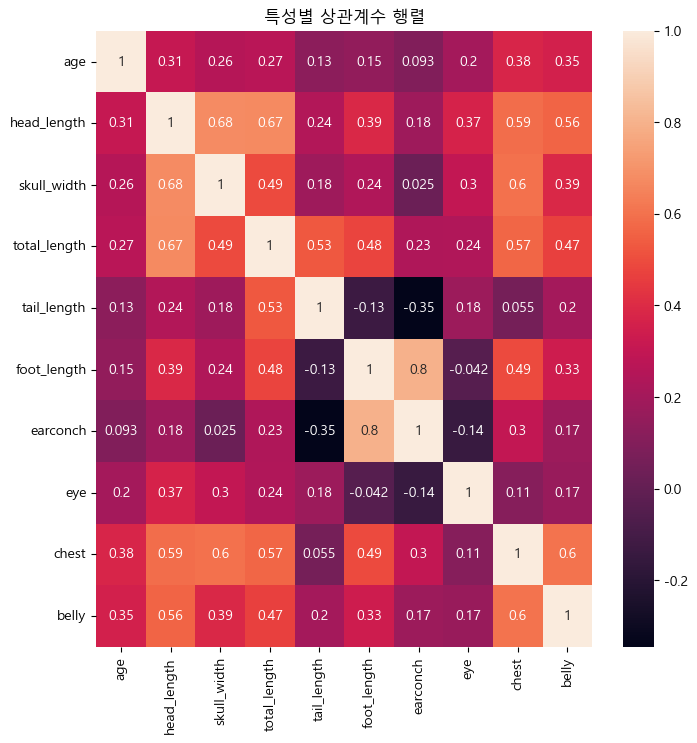

In [138]:
#상관계수 시각화
plt.figure(figsize = (8,8))
sns.heatmap(raptor_train[numeric_columns].corr() , annot= True)
plt.title("특성별 상관계수 행렬")
plt.show()

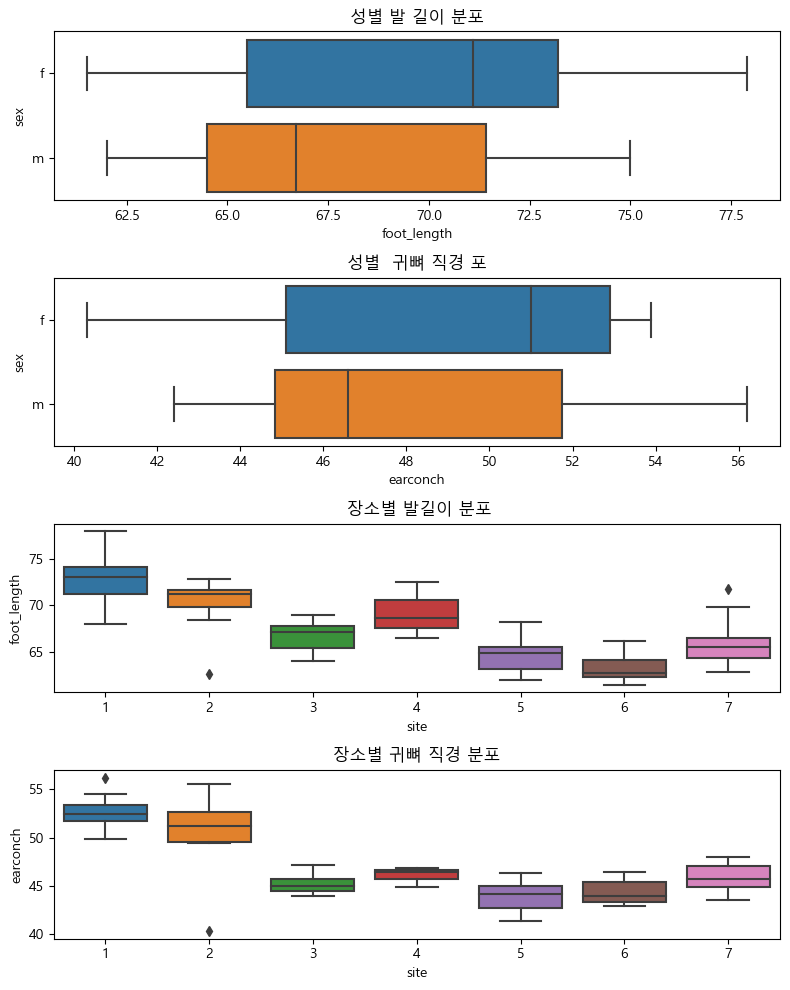

In [139]:
fig, axes = plt.subplots(4 , figsize = (8, 10))

sns.boxplot(x = "foot_length" , y = "sex" , data = raptor_train , ax = axes[0])
axes[0].set_title("성별 발 길이 분포")

sns.boxplot(x = "earconch" , y = "sex" , data = raptor_train , ax = axes[1])
axes[1].set_title("성별  귀뼈 직경 포")

sns.boxplot(x = "site" , y = "foot_length" , data = raptor_train , ax = axes[2])
axes[2].set_title(" 장소별 발길이 분포")

sns.boxplot(x = "site" , y = "earconch" , data = raptor_train , ax = axes[3])
axes[3].set_title("장소별 귀뼈 직경 분포")

plt.tight_layout()
plt.show()

In [ ]:
#위에걸 보고 1,2 site에 귀뼈직경이 높은게 나온다는걸 알수있음 

## 3. 데이터 전처리

In [140]:
for d in [raptor_train , raptor_test]:
    d.drop(columns = ["case", "site","foot_length", "earconch"], inplace = True) #안쓸열 제거
    d["sex"] = d["sex"].map({"m":0 , "f": 1} )
raptor_train

,sex,age,head_length,skull_width,total_length,tail_length,eye,chest,belly
82,1,3.0,90.0,53.8,81.5,36.0,14.0,25.0,29.0
66,0,4.0,93.3,57.6,85.0,36.5,16.5,27.5,29.5
44,0,3.0,90.7,55.9,81.0,34.0,14.6,27.0,31.5
42,1,2.0,90.0,55.5,81.0,32.0,13.4,29.0,31.0
40,1,5.0,88.4,57.0,83.0,36.5,15.9,27.0,30.5
...,...,...,...,...,...,...,...,...,...
75,0,5.0,92.4,56.8,89.0,41.0,17.8,26.0,33.0
9,1,6.0,91.8,58.0,89.5,37.5,14.4,27.5,32.0
72,0,1.0,82.5,52.3,82.0,36.5,16.0,23.5,28.0
12,0,5.0,95.1,59.9,89.5,36.0,15.8,27.0,32.0


In [141]:
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.pipeline import Pipeline


raptor_train, raptor_valid  = train_test_split(raptor_train , test_size= 0.2 , random_state=1) #train/ valid 분할

# #크기 측정 데이터 표준화
scaler = StandardScaler()
raptor_train.loc[:, "head_length":] = scaler.fit_transform(raptor_train.loc[:,"head_length":])# head_length 이후만 뽑음 
raptor_valid.loc[:, "head_length":] = scaler.fit_transform(raptor_valid.loc[:,"head_length":])
raptor_test.loc[:, "head_length":] = scaler.fit_transform(raptor_test.loc[:,"head_length":])


# #X ,y 분할

X_train = raptor_train.drop(columns= "age")
y_train = raptor_train["age"]
X_valid = raptor_valid.drop(columns= "age")
y_valid = raptor_valid["age"]
X_test = raptor_test.drop(columns= "age")
y_test = raptor_test["age"]
raptor_train

,sex,age,head_length,skull_width,total_length,tail_length,eye,chest,belly
45,0,NaN,-0.393816,-0.842238,-0.731010,-0.956669,-0.686419,-1.183539,0.869372
57,0,3.0,0.484861,2.180844,1.054014,1.192783,-0.686419,1.764143,0.106866
4,1,2.0,-0.365471,-0.256130,-0.348505,-0.419306,-0.013116,0.781582,0.106866
44,0,3.0,-0.592226,-0.379521,-1.496020,-1.494032,-0.494047,0.044662,-0.465013
52,1,3.0,0.088039,0.299130,1.054014,0.655420,1.333489,-0.446619,0.297493
...,...,...,...,...,...,...,...,...,...
64,1,5.0,0.201417,0.083196,0.416506,0.655420,-1.071163,1.027223,2.203758
10,1,9.0,0.144728,0.021500,0.671509,1.192783,-0.205488,2.009783,0.488119
76,0,6.0,0.229762,-0.286978,-0.731010,-0.419306,1.044931,-0.937899,0.869372
69,1,7.0,-0.252094,-0.225282,0.034000,0.655420,-2.033024,0.044662,0.488119


In [142]:
X_train

,sex,head_length,skull_width,total_length,tail_length,eye,chest,belly
45,0,-0.393816,-0.842238,-0.731010,-0.956669,-0.686419,-1.183539,0.869372
57,0,0.484861,2.180844,1.054014,1.192783,-0.686419,1.764143,0.106866
4,1,-0.365471,-0.256130,-0.348505,-0.419306,-0.013116,0.781582,0.106866
44,0,-0.592226,-0.379521,-1.496020,-1.494032,-0.494047,0.044662,-0.465013
52,1,0.088039,0.299130,1.054014,0.655420,1.333489,-0.446619,0.297493
...,...,...,...,...,...,...,...,...
64,1,0.201417,0.083196,0.416506,0.655420,-1.071163,1.027223,2.203758
10,1,0.144728,0.021500,0.671509,1.192783,-0.205488,2.009783,0.488119
76,0,0.229762,-0.286978,-0.731010,-0.419306,1.044931,-0.937899,0.869372
69,1,-0.252094,-0.225282,0.034000,0.655420,-2.033024,0.044662,0.488119


## 4. 모델 선택

In [111]:
#선형 회귀 
lr = LinearRegression()
model = lr.fit(X_train, y_train)

p_valid = lr.predict(X_valid)
rmse = mean_squared_error(y_valid , p_valid , squared= False)
print("선형회귀 RMSE: " +str(rmse))

선형회귀 RMSE: 2.922402059948047


In [113]:
#최고 모델 기록
best_model = model
best_score = rmse

#다항 회귀 (degree 2 ~ 5 )
for d in range(2 , 6 ) : 
    lr_pipe = Pipeline([("poly", PolynomialFeatures(degree = d )),
                       ("lr", LinearRegression())])
    model = lr_pipe.fit(X_train, y_train)
    
    p_valid = lr_pipe.predict(X_valid)
    rmse = mean_squared_error(y_valid , p_valid , squared= False)
    print(f"{d}차 다항 회귀 ) RMSE : {rmse}")
    
    #최고 모델 기록
    if rmse < best_score:
        best_score = model   

2차 다항 회귀 ) RMSE : 2.3277153957481183
3차 다항 회귀 ) RMSE : 1.5389005775094666
4차 다항 회귀 ) RMSE : 1.8337766548512278
5차 다항 회귀 ) RMSE : 1.9091678227614706


## 5. 모델 평가 

In [115]:
p_test = best_model.predict(X_test)
print("RMSE",mean_squared_error(y_test , p_test , squared= False))
print("MAE" ,mean_absolute_error(y_test,p_test))

RMSE 2.398561332584387
MAE 1.8148686393820406


마을주변 농경지대      68161
기존 주택지대        36425
산간 농경지대        35938
순수 농경지대        35615
순수 농촌지대        26916
주택 및 상가혼용지대    25040
순수 산림지대        22020
순수 경지정리지대      20349
노선 상가지대        20018
마을주변 야산지대      13183
지방도주변 농경지대     11836
마을주변 경지정리지대    11756
정비된 주택지대       11592
일반 주택지대        11260
국도주변 농경지대       8959
마을주변 산림지대       8836
근교 농경지대         7892
시가지주변 농경지대      6708
소규모 공장지대        6511
지방도변 농촌지대       6248
Name: 주위환경, dtype: int64

## 실습 2.   표준지_공시지가

In [1]:
#지목 : 임야 -> 산?  , 대 -> 집지을수있는곳 
#면적 : 제곱미터 
#용도지역1 : 지을수있는건물 있고 없고 
#도로교통 : 맹지 -아무것도없는  , 세로 (가) 세로로 길나있음. 
#공시지가 : 가격

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

## 1. 데이터불러오기

In [2]:
ol_price = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/2022_표준지_공시지가.csv")
ol_price

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,4,11110,10100,1,0008,9,서울특별시,종로구,청운동 8-9,대,...,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,5,11110,10100,1,0008,15,서울특별시,종로구,청운동 8-15,대,...,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540045,4367,50130,32026,1,1582,0,제주특별자치도,서귀포시,표선면 토산리 1582,전,...,NaN,과수원,지방도주변 농경지대,평지,사다리형,맹지,18500,토산1리노인복지회관,북측 원거리,NaN
540046,4368,50130,32026,1,1629,1,제주특별자치도,서귀포시,표선면 토산리 1629-1,전,...,NaN,전,순수 농경지대,평지,사다리형,소로한면,61000,소소름,남동측 인근,NaN
540047,4369,50130,32026,1,1766,1,제주특별자치도,서귀포시,표선면 토산리 1766-1,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,세로(가),49500,토산1리사무소,북서측 인근,NaN
540048,4370,50130,32026,1,1876,0,제주특별자치도,서귀포시,표선면 토산리 1876,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,중로한면,89000,토산1리사무소,남서측 인근,NaN


In [3]:
df_train, df_test = train_test_split(ol_price, test_size=0.2, random_state=1)


## 결측치 확인 

In [4]:
ol_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

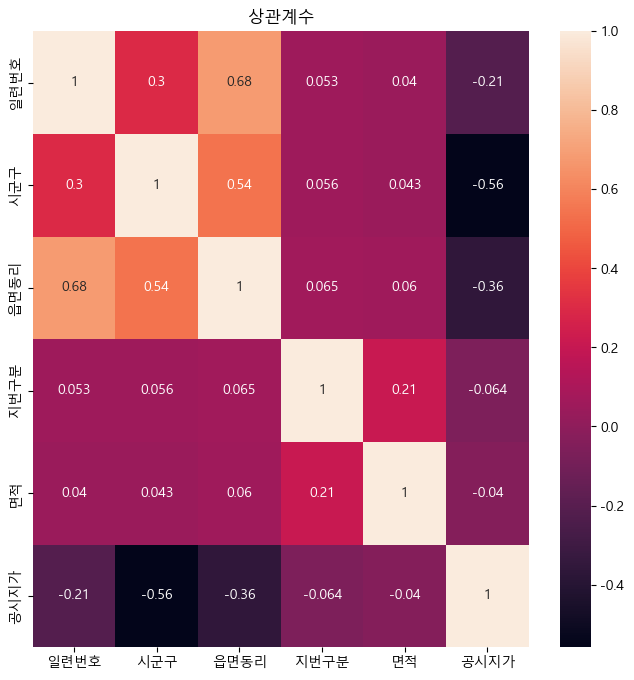

In [3]:
#상관계수. 
plt.figure(figsize=(8,8))
sns.heatmap(ol_price.corr(), annot=True)
plt.title(' 상관계수 ')
plt.show()

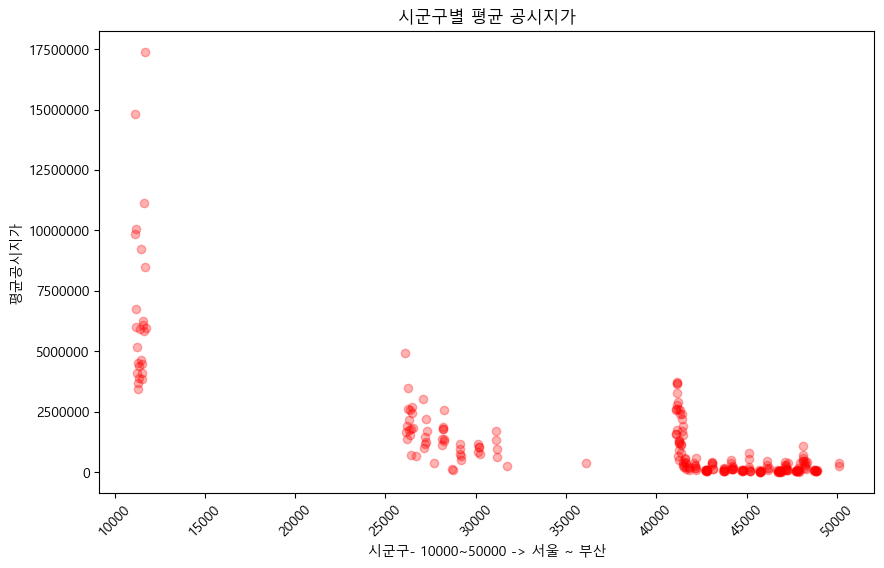

In [5]:
# 시군구별 공시지가 평균 계산
avg_prices = ol_price.groupby("시군구")["공시지가"].mean()

df = pd.DataFrame({"시군구": avg_prices.index, "평균공시지가": avg_prices.values})
plt.figure(figsize=(10, 6))
plt.scatter(df["시군구"], df["평균공시지가"], color = "red" , alpha = 0.3)
plt.xlabel("시군구- 10000~50000 -> 서울 ~ 부산")
plt.ylabel("평균공시지가")
plt.title("시군구별 평균 공시지가")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain')
plt.show()

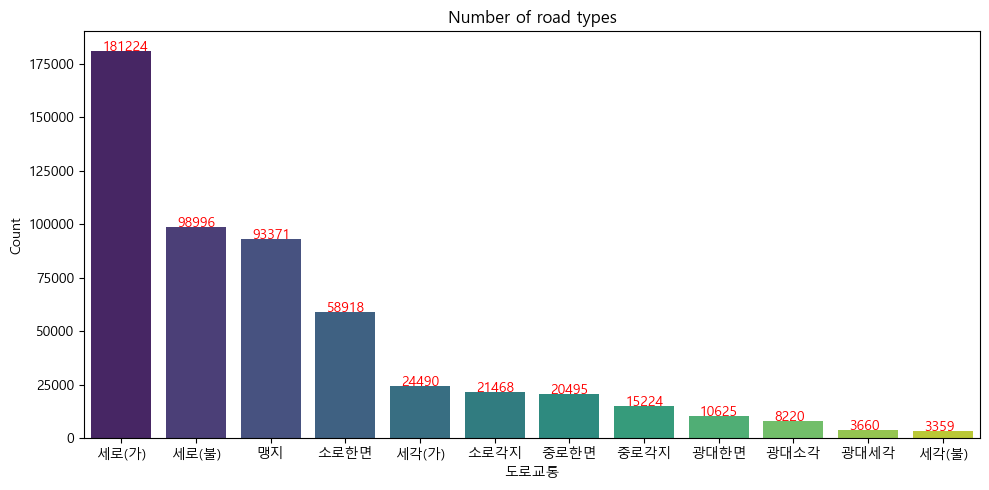

In [6]:
#도로 타입 별 개수.
site = ol_price["도로교통"].value_counts().sort_values(ascending = False)
plt.figure(figsize=(10,5))
sns.countplot(x = "도로교통", data = ol_price, palette = "viridis", order = site.index)
for i , v in enumerate(site):
    plt.text(i -0.25, v , "{:.0f}".format(v) ,color="red") 
plt.title("Number of road types")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

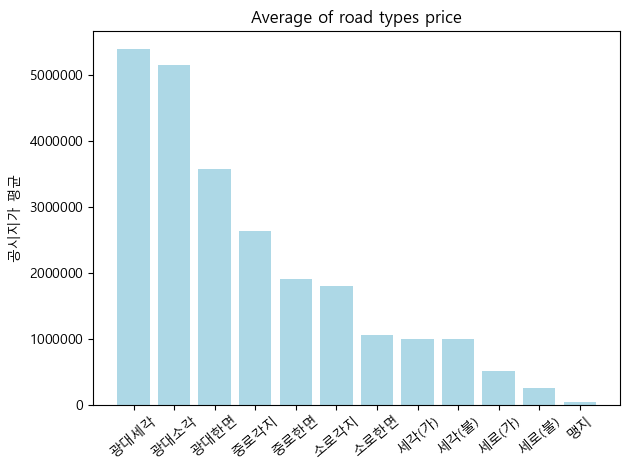

In [7]:
# 도로교통
road_type =ol_price.groupby("도로교통")["공시지가"].mean().sort_values(ascending = False)

plt.figure()
plt.bar(road_type.index, road_type.values, color = "lightblue")
plt.xticks(rotation = 40) 
plt.title("Average of road types price")
plt.ylabel("도로 타입")
plt.ylabel("공시지가 평균")

plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.show()

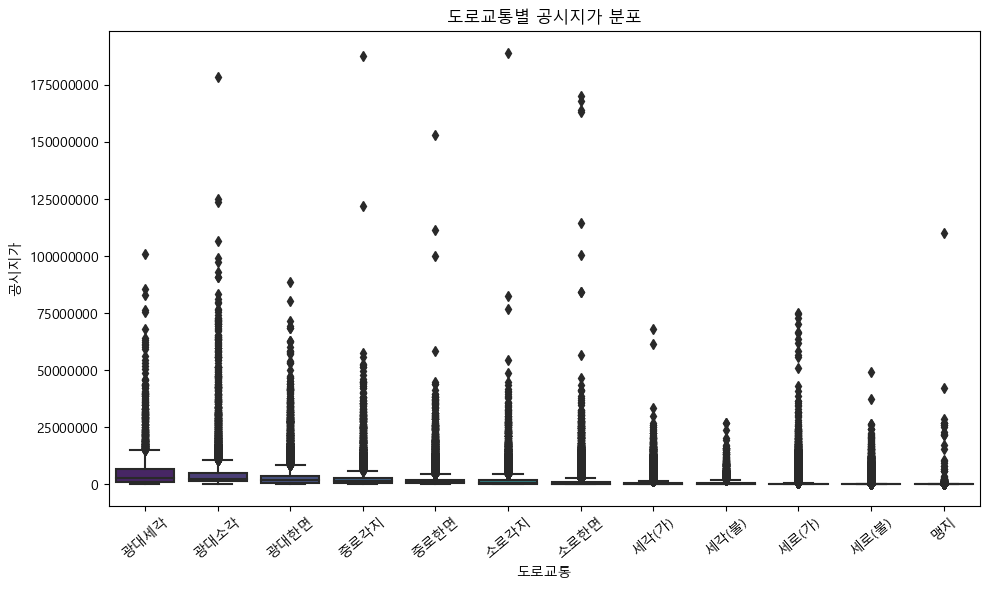

In [8]:
#도로교통 공시지가 평균
road_type = ol_price.groupby("도로교통")["공시지가"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x=ol_price["도로교통"], y=ol_price["공시지가"], order=road_type.index, palette="viridis")
plt.xlabel("도로교통")
plt.ylabel("공시지가")
plt.title("도로교통별 공시지가 분포")
plt.xticks(rotation=40)
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.show()

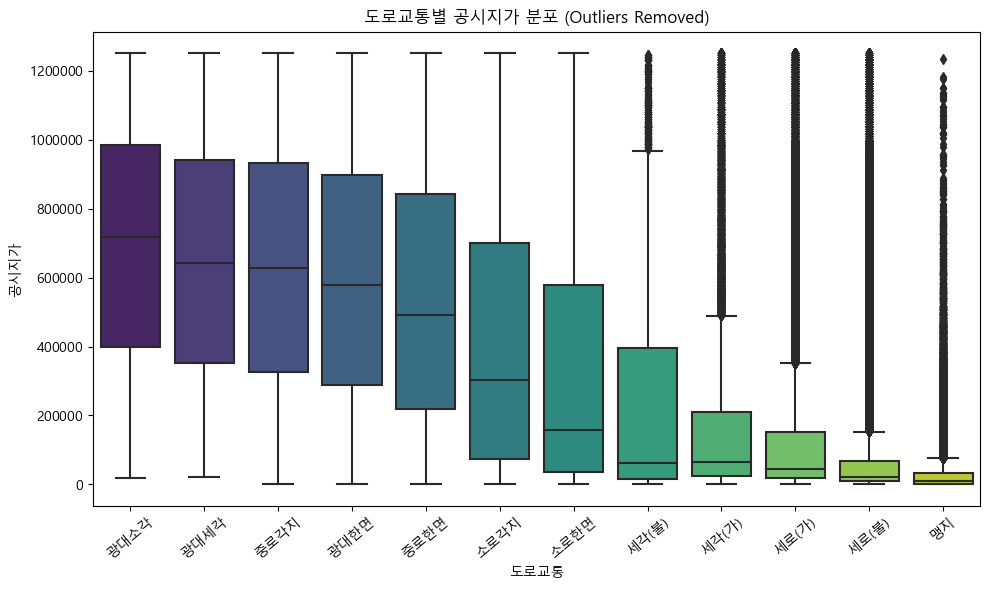

In [9]:
#이상치 제거 
Q1 = np.percentile(ol_price["공시지가"], 25)
Q3 = np.percentile(ol_price["공시지가"], 75)
IQR = Q3 - Q1

outlier_threshold = 1.5 * IQR
filtered_data = ol_price[(ol_price["공시지가"] >= Q1 - outlier_threshold) & (ol_price["공시지가"] <= Q3 + outlier_threshold)]
road_type = filtered_data.groupby("도로교통")["공시지가"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data["도로교통"], y=filtered_data["공시지가"], order=road_type.index, palette="viridis")
plt.xlabel("도로교통")
plt.ylabel("공시지가")
plt.title("도로교통별 공시지가 분포 (Outliers Removed)")
plt.xticks(rotation=40)
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.show()

In [74]:
ol_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

In [ ]:
plt.figure(figsize= (15,10))

sns.pairplot(ol_price, kind= 'reg')

KeyboardInterrupt: 

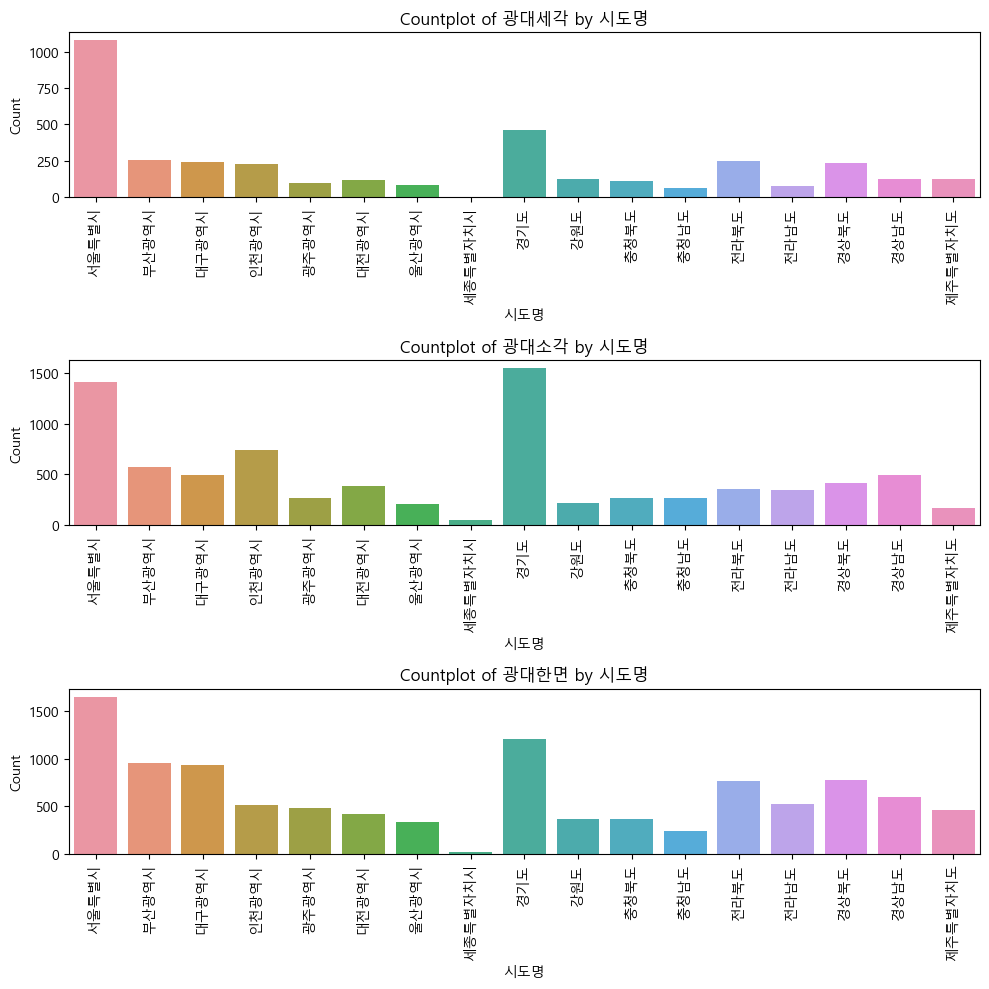

In [12]:
import seaborn as sns

selected_road_types = ["광대세각", "광대소각", "광대한면", "종로각지"]

filtered_data = ol_price[ol_price['도로교통'].isin(selected_road_types)]

if not filtered_data.empty:
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))

    for i, road_type in enumerate(selected_road_types):
        ax = axes[i//2, i%2]  
        sns.countplot(x="시도명", data=filtered_data[filtered_data['도로교통'] == road_type], ax=ax)
        ax.set_title(f"Countplot of {road_type} by 시도명")
        ax.set_xlabel("시도명")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print("No data found for the selected road types.") 

In [10]:
df_train , df_test = train_test_split(ol_price , test_size=0.2 , random_state=0)

In [11]:
#지역별 도로 교통 개수 
pivot_table = pd.pivot_table(ol_price, values="공시지가", index="시도명", columns="도로교통", aggfunc="count")

# 맹지 큰순으로 정렬 
sorted_pivot_table = pivot_table.sort_values(by="맹지", ascending=False)
sorted_pivot_table


도로교통,광대세각,광대소각,광대한면,맹지,세각(가),세각(불),세로(가),세로(불),소로각지,소로한면,중로각지,중로한면
시도명,,,,,,,,,,,,
전라남도,75,343,525,16157,2685,725,21939,16449,1601,6087,742,1200
경상남도,125,494,597,15701,2211,498,18698,13527,2077,7103,1330,1828
경상북도,234,414,773,13464,3751,262,26395,15922,2096,6298,1218,1907
경기도,464,1546,1211,10208,3317,114,26240,6775,3449,7630,2989,3102
전라북도,249,355,761,9170,2027,255,13815,10903,1149,4009,715,1113
충청남도,58,270,242,8100,2103,78,19268,7980,1262,3468,797,1049
강원도,124,219,360,6643,1276,154,11887,6798,1211,4156,811,1312
충청북도,106,270,369,4520,1207,129,10301,6562,968,3166,653,848
제주특별자치도,126,172,463,1801,457,8,3380,974,427,1473,431,913


In [90]:
average_maengji = sorted_pivot_table["맹지"].mean()
highest_maengji_regions = sorted_pivot_table.index[0]
total_maengji_count = sorted_pivot_table["맹지"].sum()

print("맹지 전체 개수 " + str(total_maengji_count))
print("맹지 평균 "+str(average_maengji))
print("맹지 제일 많은 지역" + str(highest_maengji_regions))


맹지 전체 개수 93371
맹지 평균 5492.411764705882
맹지 제일 많은 지역전라남도


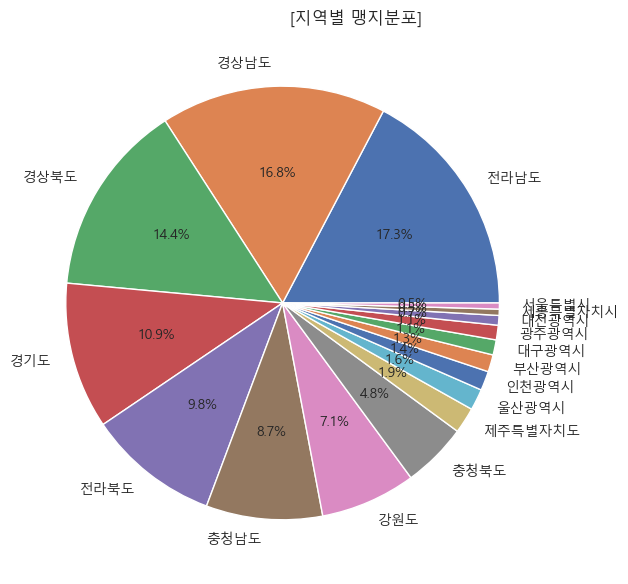

In [102]:
maengji_counts = sorted_pivot_table["맹지"]
plt.figure(figsize=(8, 6))  
plt.pie(maengji_counts, labels=maengji_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10}) 
plt.title("                         [지역별 맹지분포]")
plt.tight_layout()
plt.show()

In [104]:
ol_price["지세명"].value_counts()

평지      329611
완경사지    176510
급경사지     31013
고지        1795
저지        1121
Name: 지세명, dtype: int64

In [110]:
#위에 보이는 2% 이상인 맹지분포인 것들만 뽑아서 
#맹지안에 평지를 찾음 
regions = ['전라남도', '경상남도', '경상북도', '경기도', '전라북도', '충청남도', '강원도', '충청북도']
filtered_df = ol_price[(ol_price['시도명'].isin(regions)) & (ol_price['지세명'] == '평지') & (ol_price["도로교통"] == "맹지")]
pivot_table = pd.pivot_table(filtered_df, values='공시지가', index='시도명', columns='지세명', aggfunc='count')
pivot_table

지세명,평지
시도명,
강원도,999
경기도,3256
경상남도,1779
경상북도,2133
전라남도,2633
전라북도,2526
충청남도,2136
충청북도,764


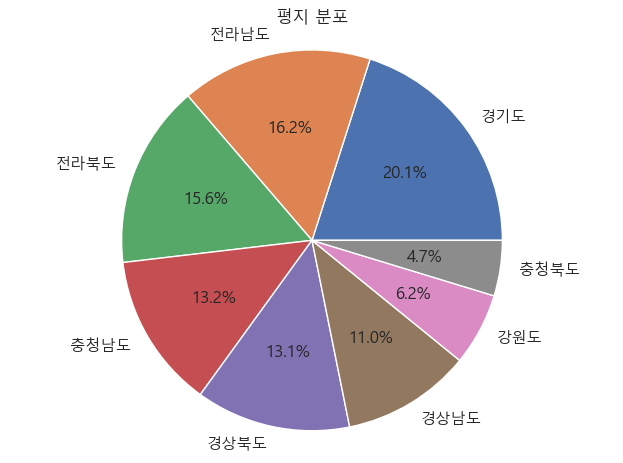

In [119]:
#맹지안에 평지안에 지역별 맹지평지 분포 
values = pivot_table['평지']
sorted_values = values.sort_values(ascending=False)
plt.pie(sorted_values, labels=sorted_values.index, autopct='%1.1f%%')
plt.title("평지 분포" )
plt.axis('equal')

plt.tight_layout()
plt.show()

In [129]:
# 면적 X 공시지가 ==> 그땅의 가치. 
ol_price["가치"]= ol_price["면적"]*ol_price["공시지가"]
ol_price["면적"]*ol_price["공시지가"]

0         5.041102e+08
1         5.283706e+08
2         1.768850e+09
3         3.188409e+09
4         1.705066e+09
              ...     
540045    1.567505e+08
540046    7.542650e+08
540047    1.441440e+08
540048    1.367930e+08
540049    7.268800e+06
Length: 540050, dtype: float64

In [140]:
#시의 면적을 계산해서 순서로 나눔. 
pivot_table = pd.pivot_table(ol_price, values="가치", index="시도명", aggfunc="sum").sort_values(by="가치", ascending=False)
pivot_table

,가치
시도명,
서울특별시,2.245299e+14
경기도,1.147945e+14
인천광역시,2.746758e+13
부산광역시,2.254385e+13
경상남도,1.610762e+13
대구광역시,1.375950e+13
충청남도,1.166390e+13
경상북도,1.013353e+13
울산광역시,7.068710e+12


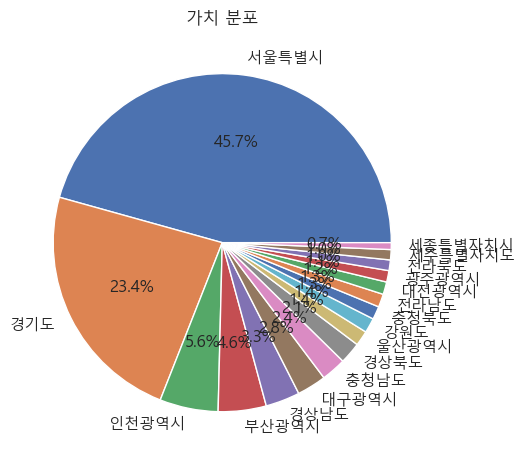

In [143]:
#시별로 가치 분포도 
values = pivot_table['가치'] 
plt.pie(values, labels=values.index, autopct='%1.1f%%')
plt.title("가치 분포")
plt.tight_layout()
plt.show()